In [1]:
import matplotlib.pyplot as plt
import numpy as np
import functions as F

import xlrd
import mlrose

E:\anaconda\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
workbook = xlrd.open_workbook("init_data_100_node/sequencenumber.xlsx")
sheet = workbook.sheets()[0] # 通过索引获取

rowNum = sheet.nrows
colNum = sheet.ncols 

dat = []
for i in range(colNum):
    rowlist = []
    for j in range(rowNum):
        rowlist.append(sheet.cell_value(j, i))
    dat.append(rowlist)
dat = np.asarray(dat)

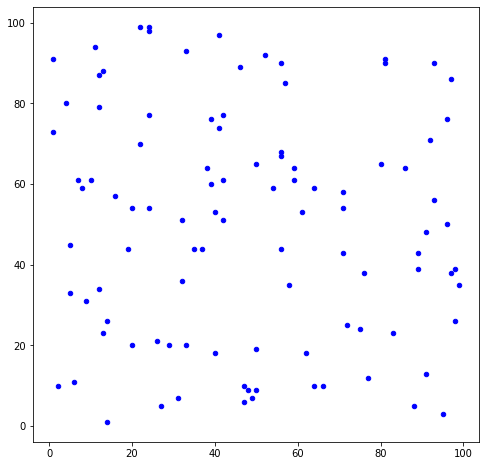

In [3]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(dat[:, 0], dat[:, 1], marker='o', s=20, c="b")
plt.show()

In [4]:
# 分区数
m = 4
# 坐标范围
limit = 100
# 点的个数
num = len(dat)

In [5]:
# 随机生成电池能量
energys =  np.random.rand(100)

In [6]:
# Prim算法生成最小生成树
distance_matrix = np.zeros((num, num))
for i in range(num):
    for j in range(num):
        distance_matrix[i, j] = np.linalg.norm(dat[i] - dat[j]) 
    
edges = F.prim(distance_matrix)
# 计算 H
connect_matrix = np.full((num, num), np.inf)
for edge in edges:
    connect_matrix[edge[0], edge[1]] = 1
    connect_matrix[edge[1], edge[0]] = 1

# 连通矩阵
connect_matrix[np.arange(num), np.arange(num)] = 0
connect_matrix = connect_matrix.tolist()

# 计算 X
k = 3
X = np.full((num, num), False)
for i in range(num):
    X[i] = np.array(F.startwith(i, connect_matrix))  <= k
    X[i, i] = False

NUM = np.sum(X * 1, axis=1)
sort_index = NUM.argsort()
NUM_pi = np.zeros(100, )
for i in range(100):
    NUM_pi[sort_index[i]] = i

In [7]:
BATT = np.zeros(100,)
for i in range(100):
    BATT[i] = np.min(energys[X[i, :]])

sort_index = BATT.argsort()
BATT_pi = np.zeros(100, )
for i in range(100):
    BATT_pi[sort_index[i]] = i

In [8]:
# 基于3跳之内的邻居节点个数和能量进行锚点选择
W = NUM_pi + BATT_pi
flags = np.full((100, ), True) 
Queue = []

while np.any(flags):
    uncom = np.where(flags)[0]
    anchor_number = uncom[np.argmax(W[flags])]
    Queue.append(anchor_number)
    flags[X[anchor_number]] = False
    flags[anchor_number] = False
print("锚点个数:", len(Queue))

锚点个数: 18


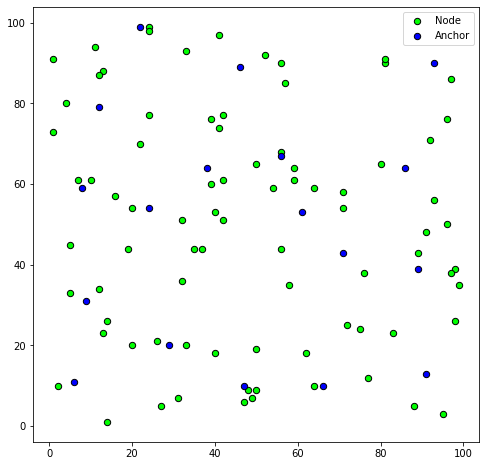

In [9]:
# 绘制锚点
fig, ax = plt.subplots(figsize=(8, 8))
Queue = np.asarray(Queue)
node_idx = [i for i in np.arange(100) if i not in Queue]

ax.scatter(dat[node_idx, 0], dat[node_idx, 1], marker='o', s=40, c='#00FF00', label="Node", edgecolors="k")
ax.scatter(dat[Queue, 0], dat[Queue, 1], marker='o', s=40, c="b", label="Anchor", edgecolors="k", )

ax.legend()
plt.show()

In [10]:
# 基于传感器节点3跳邻居之内最小电量进行锚点选择
W = BATT_pi
flags = np.full((100, ), True) 
Queue = []

while np.any(flags):
    uncom = np.where(flags)[0]
    anchor_number = uncom[np.argmax(W[flags])]
    Queue.append(anchor_number)
    flags[X[anchor_number]] = False
    flags[anchor_number] = False
print("锚点个数:", len(Queue))

锚点个数: 20


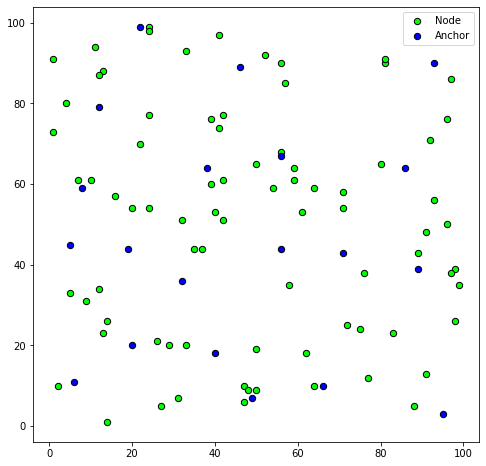

In [11]:
# 绘制锚点
fig, ax = plt.subplots(figsize=(8, 8))
Queue = np.asarray(Queue)

node_idx = [i for i in np.arange(100) if i not in Queue]

ax.scatter(dat[node_idx, 0], dat[node_idx, 1], marker='o', s=40, c='#00FF00', label="Node", edgecolors="k")
ax.scatter(dat[Queue, 0], dat[Queue, 1], marker='o', s=40, c="b", label="Anchor", edgecolors="k")

# TSP问题, 待求解
# fitness_coords = mlrose.TravellingSales(coords = dat[Queue, :])

# problem_fit = mlrose.TSPOpt(length = len(Queue), fitness_fn = fitness_coords,
#                             maximize=False)

# best_state, best_fitness = mlrose.genetic_alg(problem_fit, max_attempts=1000, max_iters=100000)

# Queue = Queue[best_state]
# for i in range(len(Queue)):
#     ax.plot([dat[Queue[i], 0], dat[Queue[(i + 1) % len(Queue)], 0]], [dat[Queue[i], 1], dat[Queue[(i + 1) % len(Queue)], 1]], linestyle="--", color="k")

ax.legend()
plt.show()